In [31]:
import numpy as np 
import pandas as pd
import copy
import sys
from astropy.io import fits
import plotly.graph_objects as go
from astropy.coordinates import SkyCoord, GalacticLSR, Galactic
import astropy.units as u
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib widget
sys.path.append('../../dash_gaia_orbits/')

# Package imports
from dash_gaia_orbits.dash_test import create_dash_app
from dash_gaia_orbits import StarClusterData, StarClusterCollection, StarClusters3DPlotter

column_renaming_dict = {'n_stars_hunt' : 'n_stars', 'U_new' : 'U', 'V_new' : 'V', 'W_new' : 'W', 'x_hunt_50' : 'x', 'y_hunt_50' : 'y', 'z_hunt_50' : 'z', 'U_err_new' : 'U_err', 'V_err_new' : 'V_err', 'W_err_new' : 'W_err'}

In [32]:
df_hunt_full = pd.read_csv('/Users/cam/Downloads/hunt_catalog_oct_13.csv')
#df_hunt_full = pd.read_csv('/Users/cam/Downloads/hunt_sample_chronos_ages.csv')
df_hunt_full = df_hunt_full.rename(columns={'n_stars_hunt' : 'n_stars', 'U_new' : 'U', 'V_new' : 'V', 'W_new' : 'W', 'x_hunt_50' : 'x', 'y_hunt_50' : 'y', 'z_hunt_50' : 'z', 'U_err_new' : 'U_err', 'V_err_new' : 'V_err', 'W_err_new' : 'W_err'})

df_hunt_good = df_hunt_full.loc[
    (df_hunt_full['n_rv_gaia_apogee_galah'] >= 5) & 
    (df_hunt_full['U_err'] < 5) & 
    (df_hunt_full['V_err'] < 5) & 
    (df_hunt_full['W_err'] < 5) &
    (df_hunt_full['age_myr'] < 200) &
    (df_hunt_full['n_stars'] > 500)
    ]

In [33]:
dfme = pd.read_csv('/Users/cam/Downloads/cluster_sample_data.csv')
# dfme = dfme.loc[dfme['n_stars'] >= 50]
dfme = dfme.drop(columns=['x', 'y', 'z'])
dfme = dfme[['name', 'family', 'age_myr', 'U', 'V', 'W', 'x_helio', 'y_helio', 'z_helio', 'n_stars', 'mass_50', 'n_sne_50']]
dfme = dfme.rename(columns={'x_helio' : 'x', 'y_helio' : 'y', 'z_helio' : 'z'})

df_ap = dfme.loc[dfme['family'] == 'alphaPer']
df_ap_cluster = dfme.loc[dfme['name'] == 'Melotte_20']
df_carina_and_columba = dfme.loc[dfme['name'].isin(['CAR', 'COL'])]

# omuamua
x,y,z = 0., 0., 0.
U, V, W = -11.622, -22.461, -7.824
# U, V, W = 33.1, -6.8, 8.3
name = 'Oumuamua'
age = 1000.
df_omuamua = pd.DataFrame({'name' : [name], 'family' : ['Oumuamua'], 'age_myr' : [age], 'U' : [U], 'V' : [V], 'W' : [W], 'x' : [x], 'y' : [y], 'z' : [z], 'n_stars' : [1]})

dfsun = pd.DataFrame({'name' : ['Sun'], 'age_myr' : [100000], 'U' : [0], 'V' : [0], 'W' : [0], 'x' : [0], 'y' : [0], 'z' : [0], 'n_stars' : [1]})

In [34]:
ap = StarClusterData(df_ap, data_name = 'Alpha Persei Family', min_size = 0, max_size = 8, color = 'violet', opacity = .5, marker_style = 'circle', show_tracks = False)
ap_cluster = StarClusterData(df_ap_cluster, data_name = 'Alpha Persei Cluster', min_size = 0, max_size = 14, color = 'violet', opacity = 1, marker_style = 'circle', show_tracks = True)
#car_and_col = StarClusterData(df_carina_and_columba, data_name = 'Carina and Columba', min_size = 0, max_size = 14, color = 'violet', opacity = 1, marker_style = 'circle', show_tracks = True)

omuamua = StarClusterData(df_omuamua, data_name = 'Oumuamua', min_size = 0, max_size = 14, color = 'orange', opacity = 1, marker_style = 'circle', show_tracks = True)
sun = StarClusterData(dfsun, data_name = 'Sun', min_size = 0, max_size = 14, color = 'yellow', opacity = 1, marker_style = 'circle', show_tracks = False)
clusters = StarClusterData(dfme, data_name = 'Clusters', min_size = 0, max_size = 8, color = 'gray', opacity = .5, marker_style = 'circle', show_tracks = False)
clusters_full = StarClusterData(df_hunt_good, data_name='Clusters Full', min_size = 0, max_size = 8, color = 'gray', opacity = .5, marker_style = 'circle', show_tracks = False)
sc = StarClusterCollection([clusters, clusters_full, ap, ap_cluster,  omuamua, sun])

In [35]:
time_int = np.arange(0., -200., -1.)
xyz_widths = (800, 800, 300)
#xyz_ranges = ([-300, 300], [-300, 300], [-300, 300])

plot_3d = StarClusters3DPlotter(
    data_collection = sc, 
    xyz_widths = xyz_widths, 
    figure_title='Orbits in reference frame of Oumuamua',
    #xyz_ranges=xyz_ranges,
    figure_theme = 'dark', 
    trace_grouping_dict=None)

#save_name = '/Users/cam/Downloads/ivs_clusters_movie_LSR_frame.html'
save_name = '/Users/cam/Downloads/omuamua_orbit.html'


fig3d = plot_3d.generate_3d_plot(
    time = time_int,
    show = False, 
    save_name =save_name, 
    static_traces = None, 
    static_traces_times = None,
    static_traces_legendonly=False,
    #focus_group = 'Gamma Vel family (IVS)',
    focus_group = 'Oumuamua',
    fade_in_time = 8, # Myr,
    show_gc_line=False,
    fade_in_and_out = False
)

In [43]:
apci = ap_cluster.df_int
oui = omuamua.df_int

s = []
for t in time_int:
    xyz_a = apci.loc[apci['time'] == t][['x', 'y', 'z']].values[0]
    xyz_o = oui.loc[oui['time'] == t][['x', 'y', 'z']].values[0]
    s.append(np.linalg.norm(xyz_a - xyz_o))

In [44]:
# plt.figure(figsize=(6,6))
# plt.plot(time_int, s, lw=2, color = 'magenta')
# plt.axhline(df_full.loc[df_full.name == 'Melotte_20'].radius_total_pc.values*2, color='gray', linestyle='--', lw=1)
# plt.xlabel('Time (Myr)')
# plt.ylabel('Distance (pc)')
# plt.title('Distance between Oumuamua and Alpha Persei Cluster')
# plt.text(-20, 74, 'Present-Day Diameter of Alpha Persei Cluster', color='gray', ha='center', va='center')
# plt.show()

In [45]:
clusters_ci = clusters_full.df_int
cluster_names = clusters_ci['name'].unique()
oui = omuamua.df_int

s = []
for t in time_int:
    xyz_a = clusters_ci.loc[clusters_ci['time'] == t][['x', 'y', 'z']]
    xyz_o = oui.loc[oui['time'] == t][['x', 'y', 'z']].values
    s.append(np.linalg.norm(xyz_a - xyz_o, axis = 1))
distance_df = pd.DataFrame(s, columns=cluster_names, index=time_int).T

In [46]:
distance_df_cut = distance_df.applymap(lambda x: x if x < 100 else np.nan)
d = distance_df_cut.T.values
d_flat = d.flatten()
# plt.figure()
# plt.hist(d_flat, bins=100)
# plt.show()

/var/folders/1d/0pb_hyfs6ljgsf6pclkykfy40000gn/T/ipykernel_72074/1002778665.py:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.




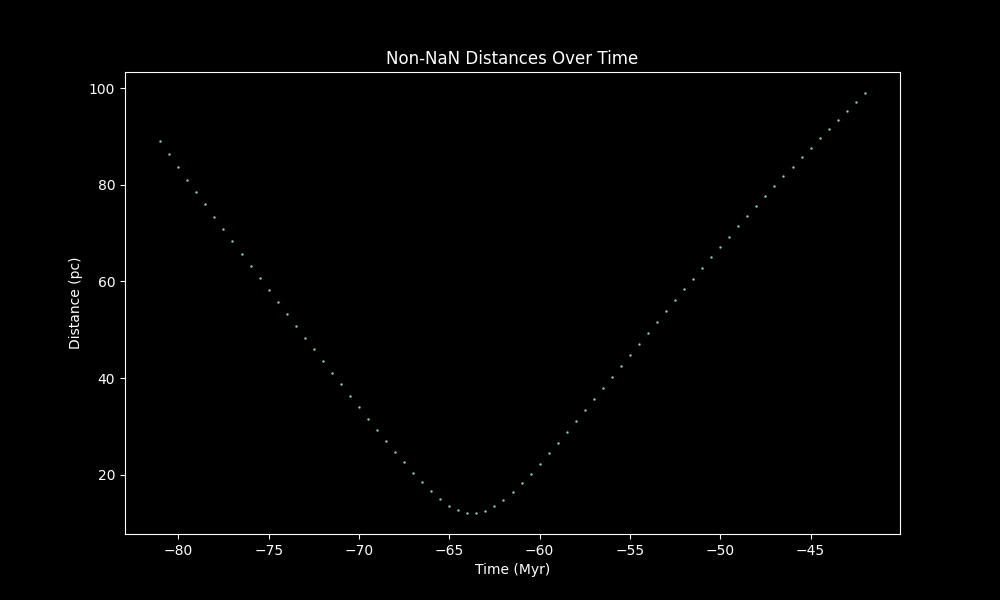

In [47]:
# Extract non-NaN values and their corresponding times
non_nan_values = distance_df_cut.stack().reset_index()
non_nan_values.columns = ['Cluster', 'Time', 'Distance']

# Plot the non-NaN values
plt.figure(figsize=(10, 6))
plt.scatter(non_nan_values['Time'], non_nan_values['Distance'], alpha=1, s=.5)
plt.xlabel('Time (Myr)')
plt.ylabel('Distance (pc)')
plt.title('Non-NaN Distances Over Time')
plt.show()

In [41]:
close_pass_clusters = non_nan_values['Cluster'].unique()

In [42]:
df_close_clusters = dfme.loc[dfme['name'].isin(close_pass_clusters)]
df_close_clusters

,name,family,age_myr,U,V,W,x,y,z,n_stars,mass_50,n_sne_50
0,ADS_16795,alphaPer,56.909672,-13.076861,-19.651073,-3.686109,-78.951939,190.523180,-9.610793,41,38.538929,0.0
6,ASCC_100,alphaPer,64.891693,-2.859905,-15.004816,-8.557416,151.885340,317.087760,79.082103,87,152.547526,1.0
9,Alessi_13,alphaPer,24.747880,-12.322993,-21.528645,-4.686470,-31.580694,-49.432191,-86.175476,167,126.344110,1.0
27,CWNU_519,none,22.589786,-8.290614,-7.896116,-3.650471,-25.927102,317.624277,41.629540,287,263.566664,2.0
30,CWNU_1015,alphaPer,34.160148,-17.039220,-23.462368,-9.038974,-143.239963,-62.037205,-72.331491,98,75.638678,1.0
47,CWNU_1143,alphaPer,18.486818,-5.601230,-18.912716,-5.634511,98.647368,-22.642895,38.705707,73,52.421620,0.0
51,CWNU_1183,none,45.876406,-2.748436,-7.645592,-4.610993,141.524319,445.874256,60.478773,94,153.953029,2.0
58,Delta_Cephei_Cluster,none,67.345093,-15.172211,-18.557999,-5.723543,-58.809441,233.414671,-1.256791,164,161.547329,2.0
61,Gaia_8,alphaPer,21.063067,-3.925118,-16.691397,-8.811802,125.993678,249.686379,73.775369,150,92.822893,1.0
65,HSC_381,alphaPer,30.657450,-2.837325,-19.209953,-8.740073,213.746706,207.567112,96.373176,288,296.034630,3.0
